In [49]:
pip install statsmodels

     |████████████████████████████████| 9.6 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 11.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder

import statsmodels.api as smf

import seaborn as sns
sns.set()

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [103]:
GdpRateDf = pd.read_csv('/Users/thejakamahaulpatha/Desktop/Data Science/Analysis/Project - President/GDP per Capita Growth Rate.csv')
PresidentDf = pd.read_csv('/Users/thejakamahaulpatha/Desktop/Data Science/Analysis/Project - President/Untitled 2.csv')

In [104]:
GdpRateDf.shape

(59, 8)

In [105]:
PresidentDf.shape

(38, 17)

In [106]:
PresidentDf.head()

,ID,Country,Name,DOB,Presidential term,Year start,Year end,Political Experience ( Years ),Educational Background,Professional Background,Political Party,University,Birth Place,Left Hand / Right Handed,Comment(HOS),Comment(start year),Political Experience
0,NaN,Sri Lanka,Gotabaya Rajapaksa,1949,1,2020,2021,2006,Army Training,Military,SLFP,Diyathalawa Defence university,"Mathara, Sri Lanka",Right,President,Major,Defence secretary
1,NaN,Sri Lanka,Maithripala Sirisena,1951,1,2015,2019,1971,School,Politician,SLFP,None,"Gampaha, Sri Lanka",Right,President,Major,SLFP youth
2,NaN,Sri Lanka,Mahinda Rajapaksa,1945,2,2010,2014,1967,Law,Politician,SLFP,Law collage,"Hambanthota, Sri Lanka",Right,President,Major,SLFP
3,NaN,Sri Lanka,Mahinda Rajapaksa,1945,1,2006,2009,1967,Law,Politician,SLFP,Law collage,"Hambanthota, Sri Lanka",Right,President,Major,SLFP
4,NaN,Sri Lanka,Chandrika Bandaranaike Kumaratunga,1945,2,2000,2005,1974,Diploma(Phd followed),Politician,SLFP,Institut d'Etudes Politiques de Paris,"Colombo, Sri Lanka",Right,President,Major,Sri lanka womens league


In [107]:
PresidentDf['Average GDP Growth Rate'] = ""
PresidentDf['Age'] = ""

In [108]:
GdpRateDf.head()

,YEAR,CHINA,UK,INDIA,SL,SINGAPORE,US,Unnamed: 7
0,1961,-27.27,2.677119,3.722743,NaN,8.136888,2.3,NaN
1,1962,-5.58,1.102910,2.931128,3.818020,7.554046,6.1,NaN
2,1963,10.30,4.874384,5.994353,2.516749,10.040621,4.4,NaN
3,1964,18.18,5.533659,7.452950,3.906434,-3.103333,5.8,NaN
4,1965,16.95,2.142177,-2.635770,2.536954,7.834583,6.4,NaN


Lets get the Average GDP growth rate for each president

In [109]:

for ind in PresidentDf.index:
    
        startDate = int(PresidentDf['Year start'][ind])
        endDate = int(PresidentDf['Year end'][ind])        
        
        startIndexArr = GdpRateDf[GdpRateDf['YEAR']==startDate].index.values
        endIndexArr = GdpRateDf[GdpRateDf['YEAR']==endDate].index.values
   
        if startIndexArr.size != 0 and endIndexArr.size !=0:
            startIndex = startIndexArr[0]
            endIndex = endIndexArr[0]
        
        if PresidentDf['Country'][ind] == 'Sri Lanka'and startIndexArr.size != 0 and endIndexArr.size !=0:
            PresidentDf.at[ind, 'Average GDP Growth Rate'] = GdpRateDf.iloc[startIndex:endIndex+1,4].mean()

        elif PresidentDf['Country'][ind] == 'India'and startIndexArr.size != 0 and endIndexArr.size !=0:   
            PresidentDf.at[ind, 'Average GDP Growth Rate'] = GdpRateDf.iloc[startIndex:endIndex+1,3].mean()

        elif PresidentDf['Country'][ind] == 'Singapore'and startIndexArr.size != 0 and endIndexArr.size !=0:   
            PresidentDf.at[ind, 'Average GDP Growth Rate'] = GdpRateDf.iloc[startIndex:endIndex+1,5].mean()
     
        elif PresidentDf['Country'][ind] == 'United States'and startIndexArr.size != 0 and endIndexArr.size !=0:   
            PresidentDf.at[ind, 'Average GDP Growth Rate'] = GdpRateDf.iloc[startIndex:endIndex+1,6].mean()

        elif PresidentDf['Country'][ind] == 'United Kingdom'and startIndexArr.size != 0 and endIndexArr.size !=0:   
            PresidentDf.at[ind, 'Average GDP Growth Rate'] = GdpRateDf.iloc[startIndex:endIndex+1,2].mean()
    
        elif PresidentDf['Country'][ind] == 'China'and startIndexArr.size != 0 and endIndexArr.size !=0:   
            PresidentDf.at[ind, 'Average GDP Growth Rate'] = GdpRateDf.iloc[startIndex:endIndex+1,1].mean()
    

In [110]:
PresidentDf

,ID,Country,Name,DOB,Presidential term,Year start,Year end,Political Experience ( Years ),Educational Background,Professional Background,Political Party,University,Birth Place,Left Hand / Right Handed,Comment(HOS),Comment(start year),Political Experience,Average GDP Growth Rate,Age
0,NaN,Sri Lanka,Gotabaya Rajapaksa,1949,1,2020,2021,2006,Army Training,Military,SLFP,Diyathalawa Defence university,"Mathara, Sri Lanka",Right,President,Major,Defence secretary,,
1,NaN,Sri Lanka,Maithripala Sirisena,1951,1,2015,2019,1971,School,Politician,SLFP,None,"Gampaha, Sri Lanka",Right,President,Major,SLFP youth,3.732474,
2,NaN,Sri Lanka,Mahinda Rajapaksa,1945,2,2010,2014,1967,Law,Politician,SLFP,Law collage,"Hambanthota, Sri Lanka",Right,President,Major,SLFP,6.784341,
3,NaN,Sri Lanka,Mahinda Rajapaksa,1945,1,2006,2009,1967,Law,Politician,SLFP,Law collage,"Hambanthota, Sri Lanka",Right,President,Major,SLFP,5.98853,
4,NaN,Sri Lanka,Chandrika Bandaranaike Kumaratunga,1945,2,2000,2005,1974,Diploma(Phd followed),Politician,SLFP,Institut d'Etudes Politiques de Paris,"Colombo, Sri Lanka",Right,President,Major,Sri lanka womens league,4.341063,
5,NaN,Sri Lanka,Chandrika Bandaranaike Kumaratunga,1945,1,1995,1999,1975,Diploma(Phd followed),Politician,SLFP,Institut d'Etudes Politiques de Paris,"Colombo, Sri Lanka",Right,President,Major,Sri lanka womens league,4.940883,
6,NaN,India,Narendra Damodardas Modi,1950,2,2019,2021,1978,Masters,Politician,BJP,Gujarat University,"Bombay, India",Right,Prime Minister,Election year,NaN,,
7,NaN,India,Narendra Damodardas Modi,1950,1,2014,2018,1978,Masters,Politician,BJP,Gujarat University,"Bombay, India",Right,Prime Minister,Election year,NaN,7.365239,
8,NaN,India,Manmohan Singh,1932,2,2009,2014,1991,DPhil,Education,INC,University of Oxford,"Punjab, India",Right,Prime Minister,Election year,NaN,6.808919,
9,NaN,India,Manmohan Singh,1932,1,2004,2008,1991,DPhil,Education,INC,University of Oxford,"Punjab, India",Right,Prime Minister,Election year,NaN,6.930923,


In [111]:
PresidentDf.shape

(38, 19)

In [112]:
for ind in PresidentDf.index:
    PresidentDf.at[ind, 'Political Experience ( Years )'] = int(PresidentDf['Year start'][ind]) - int(PresidentDf['Political Experience ( Years )'][ind])
    PresidentDf.at[ind, 'Age'] = int(PresidentDf['Year start'][ind]) - int(PresidentDf['DOB'][ind])    

In [113]:
PresidentDf.shape

(38, 19)

In [114]:
PresidentDf

,ID,Country,Name,DOB,Presidential term,Year start,Year end,Political Experience ( Years ),Educational Background,Professional Background,Political Party,University,Birth Place,Left Hand / Right Handed,Comment(HOS),Comment(start year),Political Experience,Average GDP Growth Rate,Age
0,NaN,Sri Lanka,Gotabaya Rajapaksa,1949,1,2020,2021,14,Army Training,Military,SLFP,Diyathalawa Defence university,"Mathara, Sri Lanka",Right,President,Major,Defence secretary,,71
1,NaN,Sri Lanka,Maithripala Sirisena,1951,1,2015,2019,44,School,Politician,SLFP,None,"Gampaha, Sri Lanka",Right,President,Major,SLFP youth,3.732474,64
2,NaN,Sri Lanka,Mahinda Rajapaksa,1945,2,2010,2014,43,Law,Politician,SLFP,Law collage,"Hambanthota, Sri Lanka",Right,President,Major,SLFP,6.784341,65
3,NaN,Sri Lanka,Mahinda Rajapaksa,1945,1,2006,2009,39,Law,Politician,SLFP,Law collage,"Hambanthota, Sri Lanka",Right,President,Major,SLFP,5.98853,61
4,NaN,Sri Lanka,Chandrika Bandaranaike Kumaratunga,1945,2,2000,2005,26,Diploma(Phd followed),Politician,SLFP,Institut d'Etudes Politiques de Paris,"Colombo, Sri Lanka",Right,President,Major,Sri lanka womens league,4.341063,55
5,NaN,Sri Lanka,Chandrika Bandaranaike Kumaratunga,1945,1,1995,1999,20,Diploma(Phd followed),Politician,SLFP,Institut d'Etudes Politiques de Paris,"Colombo, Sri Lanka",Right,President,Major,Sri lanka womens league,4.940883,50
6,NaN,India,Narendra Damodardas Modi,1950,2,2019,2021,41,Masters,Politician,BJP,Gujarat University,"Bombay, India",Right,Prime Minister,Election year,NaN,,69
7,NaN,India,Narendra Damodardas Modi,1950,1,2014,2018,36,Masters,Politician,BJP,Gujarat University,"Bombay, India",Right,Prime Minister,Election year,NaN,7.365239,64
8,NaN,India,Manmohan Singh,1932,2,2009,2014,18,DPhil,Education,INC,University of Oxford,"Punjab, India",Right,Prime Minister,Election year,NaN,6.808919,77
9,NaN,India,Manmohan Singh,1932,1,2004,2008,13,DPhil,Education,INC,University of Oxford,"Punjab, India",Right,Prime Minister,Election year,NaN,6.930923,72


In [115]:
PresidentDf.dtypes

ID                                float64
Country                            object
Name                               object
DOB                                 int64
Presidential term                   int64
Year start                          int64
Year end                            int64
Political Experience ( Years )      int64
Educational Background             object
Professional Background            object
Political Party                    object
University                         object
Birth Place                        object
Left Hand / Right Handed           object
Comment(HOS)                       object
Comment(start year)                object
Political Experience               object
Average GDP Growth Rate            object
Age                                object
dtype: object

In [116]:
#Find Null Values 
# PresidentDf[PresidentDf.isnull().any(axis=1)]

In [117]:
# PresidentDf = PresidentDf.dropna(subset=['Average GDP Growth Rate'])
PresidentDf = PresidentDf.drop(PresidentDf[PresidentDf['Average GDP Growth Rate'].values == ''].index)
PresidentDf = PresidentDf.drop(27)


In [118]:
PresidentDf.shape

(31, 19)

In [119]:
PresidentDf

,ID,Country,Name,DOB,Presidential term,Year start,Year end,Political Experience ( Years ),Educational Background,Professional Background,Political Party,University,Birth Place,Left Hand / Right Handed,Comment(HOS),Comment(start year),Political Experience,Average GDP Growth Rate,Age
1,NaN,Sri Lanka,Maithripala Sirisena,1951,1,2015,2019,44,School,Politician,SLFP,None,"Gampaha, Sri Lanka",Right,President,Major,SLFP youth,3.732474,64
2,NaN,Sri Lanka,Mahinda Rajapaksa,1945,2,2010,2014,43,Law,Politician,SLFP,Law collage,"Hambanthota, Sri Lanka",Right,President,Major,SLFP,6.784341,65
3,NaN,Sri Lanka,Mahinda Rajapaksa,1945,1,2006,2009,39,Law,Politician,SLFP,Law collage,"Hambanthota, Sri Lanka",Right,President,Major,SLFP,5.98853,61
4,NaN,Sri Lanka,Chandrika Bandaranaike Kumaratunga,1945,2,2000,2005,26,Diploma(Phd followed),Politician,SLFP,Institut d'Etudes Politiques de Paris,"Colombo, Sri Lanka",Right,President,Major,Sri lanka womens league,4.341063,55
5,NaN,Sri Lanka,Chandrika Bandaranaike Kumaratunga,1945,1,1995,1999,20,Diploma(Phd followed),Politician,SLFP,Institut d'Etudes Politiques de Paris,"Colombo, Sri Lanka",Right,President,Major,Sri lanka womens league,4.940883,50
7,NaN,India,Narendra Damodardas Modi,1950,1,2014,2018,36,Masters,Politician,BJP,Gujarat University,"Bombay, India",Right,Prime Minister,Election year,NaN,7.365239,64
8,NaN,India,Manmohan Singh,1932,2,2009,2014,18,DPhil,Education,INC,University of Oxford,"Punjab, India",Right,Prime Minister,Election year,NaN,6.808919,77
9,NaN,India,Manmohan Singh,1932,1,2004,2008,13,DPhil,Education,INC,University of Oxford,"Punjab, India",Right,Prime Minister,Election year,NaN,6.930923,72
10,NaN,India,Atal Bihari Vajpayee,1924,1,1998,2003,47,Masters,Politician,BJP,"DAV College, Kanpur","Madhya Pradesh, India",Right,Prime Minister,"Took two terms as one, Election year",NaN,5.893248,74
12,NaN,Singapore,LeeHsien Loong,1952,3,2016,2019,32,Masters,Military,PAP,John F. Kennedy School of Government,Singapore,Left,Prime Minister,Major,NaN,2.937875,64


In [120]:
PresidentDf['Average GDP Growth Rate'] = pd.to_numeric(PresidentDf['Average GDP Growth Rate'])
PresidentDf['Age'] = pd.to_numeric(PresidentDf['Age'])
# df['a'].astype(float, errors = 'raise')

In [121]:
PresidentDf.dtypes

ID                                float64
Country                            object
Name                               object
DOB                                 int64
Presidential term                   int64
Year start                          int64
Year end                            int64
Political Experience ( Years )      int64
Educational Background             object
Professional Background            object
Political Party                    object
University                         object
Birth Place                        object
Left Hand / Right Handed           object
Comment(HOS)                       object
Comment(start year)                object
Political Experience               object
Average GDP Growth Rate           float64
Age                                 int64
dtype: object

Age , Political Experience ( Years ) , Educational Background  , Professional Background , Political Party,University, University , Birth Place, Left Hand / Right Handed , 

In [122]:
# Let's First try to do a regression analysis using Age variable only

In [123]:
x = PresidentDf.iloc[:,[18]].values
y = PresidentDf.iloc[:,17].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1) 

In [124]:
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [125]:
y_pred = regr.predict(x_test)

In [126]:
y_pred

array([6.47129773, 4.8306511 , 4.23405232, 4.38320202, 4.97980079,
       5.57639957, 3.63745355])

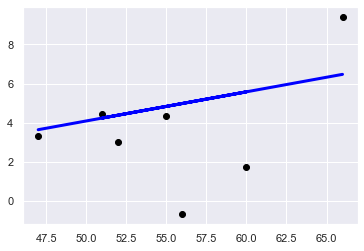

In [127]:
plt.scatter(x_test,y_test,  color='black')
plt.plot(x_test,y_pred, color='blue', linewidth=3)

In [128]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [0.14914969]


# Convert ordinal categorical variables to numerical with OneHotEncoder

## Attribute : Educational Background

https://www.youtube.com/watch?v=0w78CHM_ubM

https://www.youtube.com/watch?v=9yl6-HEY7_s&list=RDQMVWVj5mBR0h4&start_radio=1

In [129]:
PresidentDf

,ID,Country,Name,DOB,Presidential term,Year start,Year end,Political Experience ( Years ),Educational Background,Professional Background,Political Party,University,Birth Place,Left Hand / Right Handed,Comment(HOS),Comment(start year),Political Experience,Average GDP Growth Rate,Age
1,NaN,Sri Lanka,Maithripala Sirisena,1951,1,2015,2019,44,School,Politician,SLFP,None,"Gampaha, Sri Lanka",Right,President,Major,SLFP youth,3.732474,64
2,NaN,Sri Lanka,Mahinda Rajapaksa,1945,2,2010,2014,43,Law,Politician,SLFP,Law collage,"Hambanthota, Sri Lanka",Right,President,Major,SLFP,6.784341,65
3,NaN,Sri Lanka,Mahinda Rajapaksa,1945,1,2006,2009,39,Law,Politician,SLFP,Law collage,"Hambanthota, Sri Lanka",Right,President,Major,SLFP,5.988530,61
4,NaN,Sri Lanka,Chandrika Bandaranaike Kumaratunga,1945,2,2000,2005,26,Diploma(Phd followed),Politician,SLFP,Institut d'Etudes Politiques de Paris,"Colombo, Sri Lanka",Right,President,Major,Sri lanka womens league,4.341063,55
5,NaN,Sri Lanka,Chandrika Bandaranaike Kumaratunga,1945,1,1995,1999,20,Diploma(Phd followed),Politician,SLFP,Institut d'Etudes Politiques de Paris,"Colombo, Sri Lanka",Right,President,Major,Sri lanka womens league,4.940883,50
7,NaN,India,Narendra Damodardas Modi,1950,1,2014,2018,36,Masters,Politician,BJP,Gujarat University,"Bombay, India",Right,Prime Minister,Election year,NaN,7.365239,64
8,NaN,India,Manmohan Singh,1932,2,2009,2014,18,DPhil,Education,INC,University of Oxford,"Punjab, India",Right,Prime Minister,Election year,NaN,6.808919,77
9,NaN,India,Manmohan Singh,1932,1,2004,2008,13,DPhil,Education,INC,University of Oxford,"Punjab, India",Right,Prime Minister,Election year,NaN,6.930923,72
10,NaN,India,Atal Bihari Vajpayee,1924,1,1998,2003,47,Masters,Politician,BJP,"DAV College, Kanpur","Madhya Pradesh, India",Right,Prime Minister,"Took two terms as one, Election year",NaN,5.893248,74
12,NaN,Singapore,LeeHsien Loong,1952,3,2016,2019,32,Masters,Military,PAP,John F. Kennedy School of Government,Singapore,Left,Prime Minister,Major,NaN,2.937875,64


In [130]:
PresidentDf.shape

(31, 19)

In [131]:
PresidentDf['Educational Background'].unique()

array(['School', 'Law', 'Diploma(Phd followed)', 'Masters', 'DPhil', 'JD',
       'Bachelor’s', 'PhD', 'LLD'], dtype=object)

In [132]:
newPd = PresidentDf

In [133]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(PresidentDf[['Educational Background']]).toarray())


In [134]:
enc_df.shape

(31, 9)

In [135]:
PresidentDf.reset_index(drop=True, inplace=True)
print(PresidentDf.index.values)
PresidentDf.shape

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


(31, 19)

In [136]:
PresidentDf

,ID,Country,Name,DOB,Presidential term,Year start,Year end,Political Experience ( Years ),Educational Background,Professional Background,Political Party,University,Birth Place,Left Hand / Right Handed,Comment(HOS),Comment(start year),Political Experience,Average GDP Growth Rate,Age
0,NaN,Sri Lanka,Maithripala Sirisena,1951,1,2015,2019,44,School,Politician,SLFP,None,"Gampaha, Sri Lanka",Right,President,Major,SLFP youth,3.732474,64
1,NaN,Sri Lanka,Mahinda Rajapaksa,1945,2,2010,2014,43,Law,Politician,SLFP,Law collage,"Hambanthota, Sri Lanka",Right,President,Major,SLFP,6.784341,65
2,NaN,Sri Lanka,Mahinda Rajapaksa,1945,1,2006,2009,39,Law,Politician,SLFP,Law collage,"Hambanthota, Sri Lanka",Right,President,Major,SLFP,5.988530,61
3,NaN,Sri Lanka,Chandrika Bandaranaike Kumaratunga,1945,2,2000,2005,26,Diploma(Phd followed),Politician,SLFP,Institut d'Etudes Politiques de Paris,"Colombo, Sri Lanka",Right,President,Major,Sri lanka womens league,4.341063,55
4,NaN,Sri Lanka,Chandrika Bandaranaike Kumaratunga,1945,1,1995,1999,20,Diploma(Phd followed),Politician,SLFP,Institut d'Etudes Politiques de Paris,"Colombo, Sri Lanka",Right,President,Major,Sri lanka womens league,4.940883,50
5,NaN,India,Narendra Damodardas Modi,1950,1,2014,2018,36,Masters,Politician,BJP,Gujarat University,"Bombay, India",Right,Prime Minister,Election year,NaN,7.365239,64
6,NaN,India,Manmohan Singh,1932,2,2009,2014,18,DPhil,Education,INC,University of Oxford,"Punjab, India",Right,Prime Minister,Election year,NaN,6.808919,77
7,NaN,India,Manmohan Singh,1932,1,2004,2008,13,DPhil,Education,INC,University of Oxford,"Punjab, India",Right,Prime Minister,Election year,NaN,6.930923,72
8,NaN,India,Atal Bihari Vajpayee,1924,1,1998,2003,47,Masters,Politician,BJP,"DAV College, Kanpur","Madhya Pradesh, India",Right,Prime Minister,"Took two terms as one, Election year",NaN,5.893248,74
9,NaN,Singapore,LeeHsien Loong,1952,3,2016,2019,32,Masters,Military,PAP,John F. Kennedy School of Government,Singapore,Left,Prime Minister,Major,NaN,2.937875,64


In [137]:
Mypd = pd.concat([newPd,enc_df],axis=1)

In [160]:
Mypd

,ID,Country,Name,DOB,Presidential term,Year start,Year end,Political Experience ( Years ),Educational Background,Professional Background,Political Party,University,Birth Place,Left Hand / Right Handed,Comment(HOS),Comment(start year),Political Experience,Average GDP Growth Rate,Age,0,1,2,3,4,5,6,7,8
0,NaN,Sri Lanka,Maithripala Sirisena,1951,1,2015,2019,44,School,Politician,SLFP,None,"Gampaha, Sri Lanka",Right,President,Major,SLFP youth,3.732474,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,NaN,Sri Lanka,Mahinda Rajapaksa,1945,2,2010,2014,43,Law,Politician,SLFP,Law collage,"Hambanthota, Sri Lanka",Right,President,Major,SLFP,6.784341,65,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,NaN,Sri Lanka,Mahinda Rajapaksa,1945,1,2006,2009,39,Law,Politician,SLFP,Law collage,"Hambanthota, Sri Lanka",Right,President,Major,SLFP,5.988530,61,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,NaN,Sri Lanka,Chandrika Bandaranaike Kumaratunga,1945,2,2000,2005,26,Diploma(Phd followed),Politician,SLFP,Institut d'Etudes Politiques de Paris,"Colombo, Sri Lanka",Right,President,Major,Sri lanka womens league,4.341063,55,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,Sri Lanka,Chandrika Bandaranaike Kumaratunga,1945,1,1995,1999,20,Diploma(Phd followed),Politician,SLFP,Institut d'Etudes Politiques de Paris,"Colombo, Sri Lanka",Right,President,Major,Sri lanka womens league,4.940883,50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,NaN,India,Narendra Damodardas Modi,1950,1,2014,2018,36,Masters,Politician,BJP,Gujarat University,"Bombay, India",Right,Prime Minister,Election year,NaN,7.365239,64,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,NaN,India,Manmohan Singh,1932,2,2009,2014,18,DPhil,Education,INC,University of Oxford,"Punjab, India",Right,Prime Minister,Election year,NaN,6.808919,77,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,NaN,India,Manmohan Singh,1932,1,2004,2008,13,DPhil,Education,INC,University of Oxford,"Punjab, India",Right,Prime Minister,Election year,NaN,6.930923,72,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,NaN,India,Atal Bihari Vajpayee,1924,1,1998,2003,47,Masters,Politician,BJP,"DAV College, Kanpur","Madhya Pradesh, India",Right,Prime Minister,"Took two terms as one, Election year",NaN,5.893248,74,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,NaN,Singapore,LeeHsien Loong,1952,3,2016,2019,32,Masters,Military,PAP,John F. Kennedy School of Government,Singapore,Left,Prime Minister,Major,NaN,2.937875,64,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [138]:
Mypd.columns.get_loc("Age")

18

In [139]:
# Let's First try to do a regression analysis using Educational Background variable only

In [140]:
x = Mypd.iloc[:,19:28].values
y = Mypd.iloc[:,17].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1) 

In [141]:
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [142]:
y_pred = regr.predict(x_test)
y_pred

array([7.54617903, 4.94088314, 1.59266321, 7.54617903, 5.41213904,
       7.54617903, 1.59266321])

In [143]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 2.13403999  1.45778152 -0.47125591 -3.81947583  1.79370209  0.97429632
 -0.38942319  0.         -1.679665  ]


In [144]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.9122717934940443


Feature: 0, Score: 2.13404
Feature: 1, Score: 1.45778
Feature: 2, Score: -0.47126
Feature: 3, Score: -3.81948
Feature: 4, Score: 1.79370
Feature: 5, Score: 0.97430
Feature: 6, Score: -0.38942
Feature: 7, Score: 0.00000
Feature: 8, Score: -1.67966


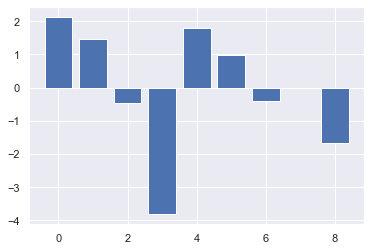

In [145]:
#I will try with LinearRegression even though it is not a classification algorithm and not suitable for this project

model = linear_model.LinearRegression()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Checking the summary table

In [158]:
x1 = smf.add_constant(x)

In [159]:
results = smf.OLS(y,x1).fit()

In [157]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     1.324
Date:                Tue, 25 May 2021   Prob (F-statistic):              0.283
Time:                        22:02:45   Log-Likelihood:                -71.408
No. Observations:                  31   AIC:                             160.8
Df Residuals:                      22   BIC:                             173.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2377      0.641      6.609      0.0